In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from scipy import ndimage
%matplotlib inline
import importlib

In [ ]:
!git clone https://github.com/knazeri/coursera.git

Cloning into 'coursera'...
remote: Enumerating objects: 694, done.
remote: Total 694 (delta 0), reused 0 (delta 0), pack-reused 694
Receiving objects: 100% (694/694), 134.71 MiB | 27.66 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Updating files: 100% (578/578), done.


In [ ]:
lr_utils=importlib.import_module("coursera.deep-learning.1-neural-networks-and-deep-learning.2-logistic-regression-as-a-neural-network.lr_utils")

In [6]:
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [7]:
train_set_y,test_set_y=train_set_y_orig,test_set_y_orig

y = [1], it's a 'cat' picture.


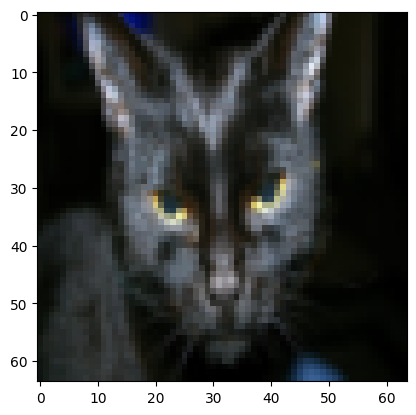

In [8]:
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [9]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
n_px=train_set_x_orig[0].shape[0]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(n_px))
print ("Each image is of size: (" + str(n_px) + ", " + str(n_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [10]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [11]:
train_set_x=train_set_x_flatten/255.
test_set_x=test_set_x_flatten/255.

In [12]:
def sigmoid(z):
  s=1/(1+np.exp(-z));
  return s

In [13]:
def initialize_with_zeros(dim):
  w=np.zeros([dim,1])
  b=0
  assert(w.shape==(dim,1))
  assert(isinstance(b,float) or isinstance(b,int))
  return w,b

In [14]:
def propagate(w,b,X,Y):
  m=X.shape[1]
  A=sigmoid(np.dot(w.T,X)+b)
  cost=-np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m
  dw=np.dot(X,(A-Y).T)/m
  db=np.sum(A-Y)/m
  assert(dw.shape==w.shape)
  assert(db.dtype== float )
  cost=np.squeeze(cost)
  assert(cost.shape==())
  grads={"dw":dw,
         "db":db}
  return grads,cost

In [15]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [16]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
  costs=[]
  for i in range(num_iterations):
    grads,cost=propagate(w,b,X,Y)
    dw=grads["dw"]
    db=grads["db"]
    w=w-learning_rate*dw
    b=b-learning_rate*db
    if i%100==0:
      costs.append(cost)
    if print_cost and i%100==0:
      print ("Cost after iteration %i: %f" %(i, cost))
  params={"w":w,
          "b":b}
  grads={"dw":dw,
         "db":db}
  return params,grads,costs

In [18]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [19]:
def predict(w,b,X):
  m=X.shape[1]
  Y_prediction=np.zeros((1,m))
  w=w.reshape(X.shape[0],1)
  A=sigmoid(np.dot(w.T,X)+b)
  for i in range(A.shape[1]):
    Y_prediction[0][i]=1 if A[0][i]>0.5 else 0
  assert(Y_prediction.shape==(1,m))
  return Y_prediction

In [20]:
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [34]:
def model(X_train,Y_train,X_test,Y_test,num_iterations=2000,learning_rate=0.005,print_cost=True):
  w,b=initialize_with_zeros(X_train.shape[0])
  parameters,grads,costs=optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
  w=parameters["w"]
  b=parameters["b"]
  Y_prediction_test=predict(w,b,X_test)
  Y_prediction_train=predict(w,b,X_train)
  print("train accuracy : {} %".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
  d={"costs":costs,
     "Y_prediction_test":Y_prediction_test,
     "Y_prediction_train":Y_prediction_train,
     "w":w,
     "b":b,
     "learning_rate":learning_rate,
     "num_iterations":num_iterations}
  return d

In [35]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy : 99.04306220095694 %
test accuracy: 70.0 %


y = 1, you predicted that it is a "non-cat" picture.


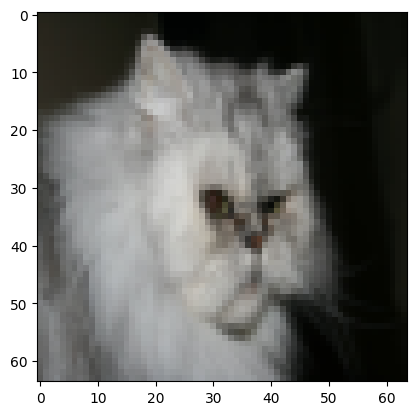

In [23]:
index = 10
plt.imshow(test_set_x[:,index].reshape((n_px, n_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

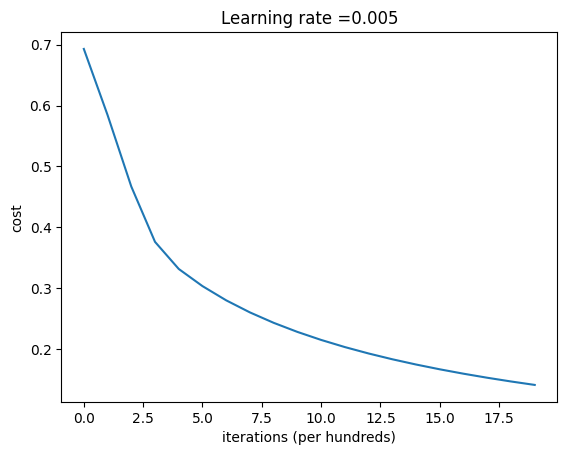

In [31]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


learning rate is: 0.01
train accuracy : 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy : 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy : 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



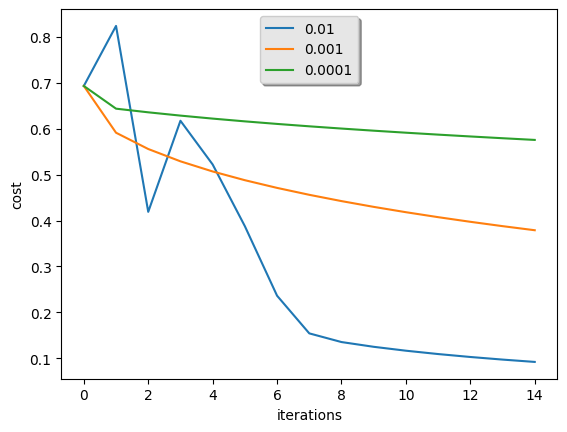

In [36]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

y = 1.0, your algorithm predicts a "cat" picture.


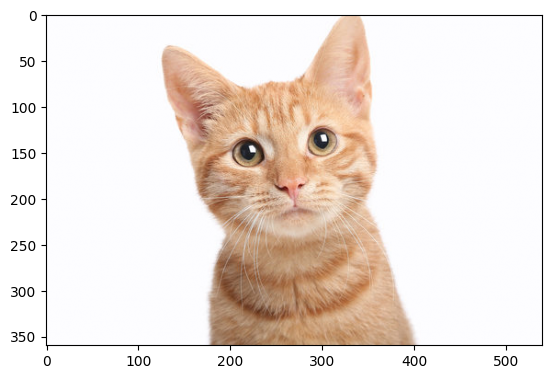

In [91]:
## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image = "img9.jpg"   # change this to the name of your image file
## END CODE HERE ##
import skimage
# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(plt.imread(fname))
image = image/255.
size=np.array([n_px,n_px]).astype(int)
my_image = skimage.transform.resize(image,size,order=3).reshape((1, n_px*n_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")